Name: Parth Kirit Parmar 

Class: BE-B 

Roll no: 27(72033127H)  

Problem Statement: Given a bank customer, build a neural network based classifier that can  determine whether they will leave or not in the next 6 months 

In [1]:
#import required libraries  
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#Dropping unnecessary columns  
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)


In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
#Visualization  
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [14]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


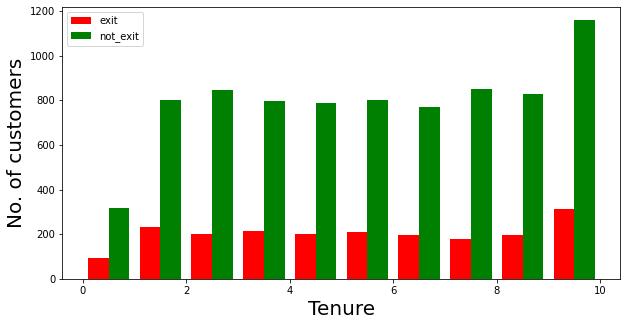

In [15]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [16]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

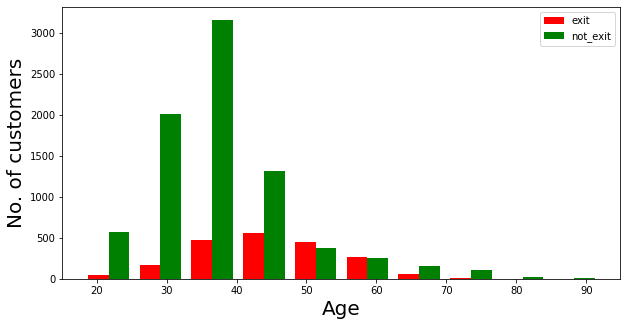

In [17]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [18]:
#Converting the categorical variables 
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [19]:

df = pd.concat([df,gender,states], axis = 1)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
#splitting the training & testing dataset 
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']] 

In [22]:
y = df['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

Normalizing the values with mean as 0 and Standard Deviation as 1

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[-0.71878936,  3.5436737 , -1.03367599, ...,  0.91186722,
         1.73668197, -0.58086939],
       [-0.02794035,  2.39872404, -1.37922193, ..., -1.09665089,
        -0.57581067,  1.72155741],
       [-0.46100988, -0.27282515,  0.6940537 , ...,  0.91186722,
        -0.57581067, -0.58086939],
       ...,
       [-0.08980743, -0.55906256, -1.03367599, ...,  0.91186722,
        -0.57581067, -0.58086939],
       [-0.83221233, -0.84529997,  0.34850776, ...,  0.91186722,
         1.73668197, -0.58086939],
       [-0.32696455,  0.29964968, -1.03367599, ..., -1.09665089,
        -0.57581067, -0.58086939]])

In [27]:
X_test

array([[ 0.29170621,  1.15836192, -1.37922193, ..., -1.09665089,
         1.73668197, -0.58086939],
       [ 0.62166394, -0.27282515, -0.34258412, ..., -1.09665089,
        -0.57581067, -0.58086939],
       [-0.12074096,  0.20423721,  1.38514558, ..., -1.09665089,
         1.73668197, -0.58086939],
       ...,
       [-0.58474403,  0.58588709,  0.34850776, ..., -1.09665089,
        -0.57581067,  1.72155741],
       [ 0.71446456, -0.27282515, -0.68813006, ...,  0.91186722,
        -0.57581067, -0.58086939],
       [ 1.40531357, -0.65447503, -1.03367599, ..., -1.09665089,
         1.73668197, -0.58086939]])

Building the classifier model using Keras 

In [28]:
import keras 

In [29]:
#To create sequential neural network
from keras.models import Sequential 
#To create hidden layers 
from keras.layers import Dense

In [30]:
classifier = Sequential()

In [31]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

In [32]:
#Adding second hidden layers 
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))

In [33]:
#Final neuron will be having siigmoid function 
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform"))

In [34]:
##To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output 
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

In [35]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Fitting the ANN to training dataset 
classifier.fit(X_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 [==============================] - 1s 987us/step - loss: 0.5003 - accuracy: 0.7983
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4213 - accuracy: 0.7993
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.7993
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8091
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0.8310
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3864 - accuracy: 0.8314
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3806 - accuracy: 0.8350
Epoch 8/50
700/700 [==============================] - 1s 976us/step - loss: 0.3761 - accuracy: 0.8411
Epoch 9/50
700/700 [==============================] - 1s 996us/step - loss: 0.3720 - accuracy: 0.8443
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.3684 - accuracy: 

In [37]:
#Predict the result 
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) 

94/94 [==============================] - 0s 750us/step


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [39]:
cm = confusion_matrix(y_test,y_pred)

In [40]:
cm

array([[2288,   80],
       [ 356,  276]])

In [41]:
accuracy = accuracy_score(y_test,y_pred)

In [42]:
accuracy

0.8546666666666667

Text(69.0, 0.5, 'Truth')

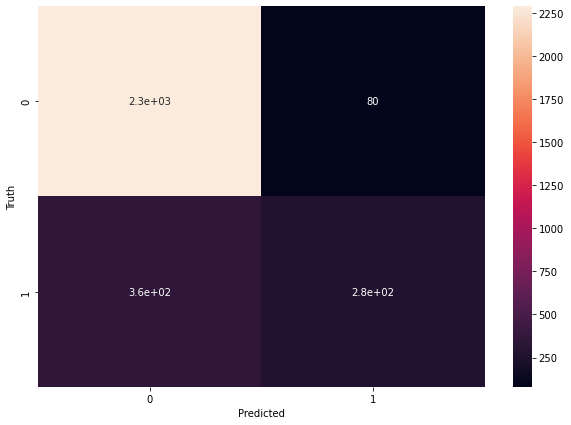

In [43]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2368
           1       0.78      0.44      0.56       632

    accuracy                           0.85      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.85      0.84      3000

